In [1]:
from datasets import load_dataset
from pathlib import Path
from pprint import pprint
import json
import re
from copy import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [8]:
def add_method_ids(example):
    for i, method in enumerate(example['methods_info']):
        method['method_id'] = example['task_id'] + '_' + str(i)
    return example


def add_method_summary(example):
    for method in example['methods_info']:
        # Extract the method description and clean it up
        method_description = re.sub('”“”|“”“', '"""', method['method_description'])
        method_description = re.sub(r'^.*\"\"\"(.*?)(?::param|:return|>>>|\"\"\").*$', r'\1', method_description, flags=re.DOTALL).strip() 
        method_summary = re.sub('\s+', ' ', method_description)
        method['method_summary'] = method_summary
    return example


def add_class_summary(example):
    # Extract the class description and clean it up
    class_summary = re.sub('”“”|“”“|"""', '', example['class_description']).strip()
    class_summary = re.sub('\s+', ' ', class_summary)
    example['class_summary'] = class_summary
    return example


dataset = load_dataset("FudanSELab/ClassEval")
ds = dataset['test']
ds = ds.map(add_method_ids)
ds = ds.map(add_method_summary)
ds = ds.map(add_class_summary)
df = ds.to_pandas()
df_mce = df.explode('methods_info').reset_index(drop=True)
df_mce['method_summary_length'] = df_mce['methods_info'].apply(lambda x: len(x['method_summary']) if x['method_summary'] else 0)
df_mce['method_code_length'] = df_mce['methods_info'].apply(lambda x: len(x['solution_code']) if x['solution_code'] else 0)

In [10]:
DATA_DIR = Path('../../data/preprocessed')
eval_df = pd.read_json(DATA_DIR / 'method-level-mcsn.jsonl', lines=True)
fewshot_df = pd.read_json(DATA_DIR / 'method-level-mcsn-few-shot.jsonl', lines=True)
df_mcsn = pd.concat([eval_df, fewshot_df])
df_mcsn['method_summary_length'] = df_mcsn['method_summary'].str.len()
df_mcsn['method_code_length'] = df_mcsn['method_code'].str.len()

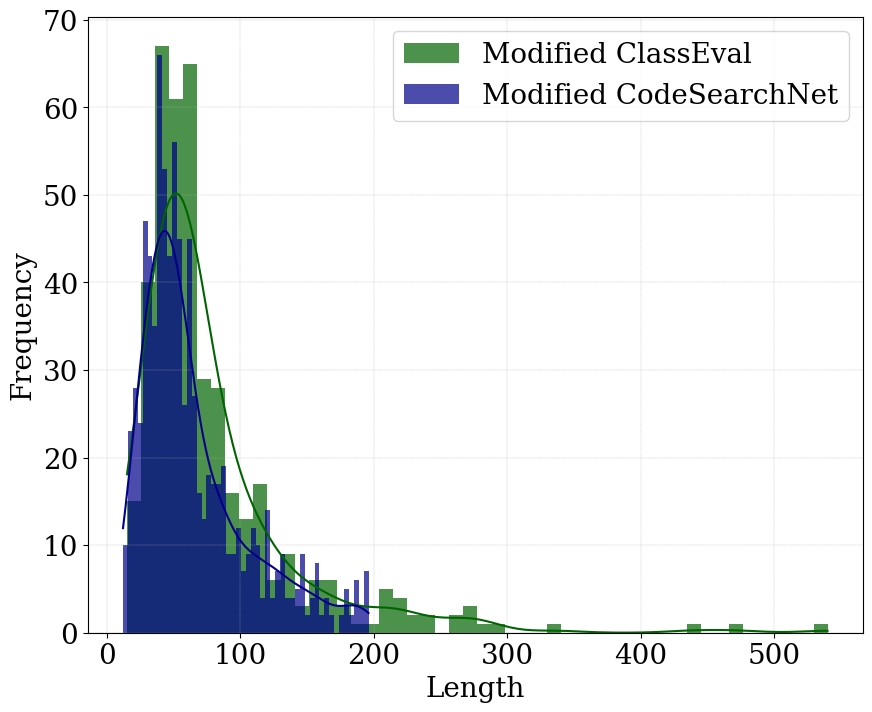

In [31]:
plt.rcParams.update({
    'font.size': 20,
    'font.family': 'serif',
})
plt.figure(figsize=(10, 8))
sns.histplot(data=df_mce, x='method_summary_length', bins=50, kde=True, color='darkgreen', alpha=0.7, linewidth=0, label='Modified ClassEval')
sns.histplot(data=df_mcsn, x='method_summary_length', bins=50, kde=True, color='darkblue', alpha=0.7, linewidth=0, label='Modified CodeSearchNet')
plt.xlabel('Length')
# plt.xticks(np.arange(0, 550, 25))
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.25)
plt.legend()
plt.show()

In [12]:
df_mce.describe()

,method_summary_length,method_code_length
count,410.000000,410.000000
mean,79.117073,281.526829
std,63.120415,240.401092
min,15.000000,44.000000
25%,43.000000,132.250000
50%,60.000000,209.500000
75%,89.750000,342.500000
max,540.000000,1817.000000


In [13]:
df_mcsn.describe()

,method_summary_length,method_code_length
count,846.000000,846.000000
mean,64.763593,683.797872
std,40.154122,587.120217
min,12.000000,87.000000
25%,38.000000,288.000000
50%,52.000000,492.000000
75%,80.750000,863.000000
max,196.000000,3590.000000


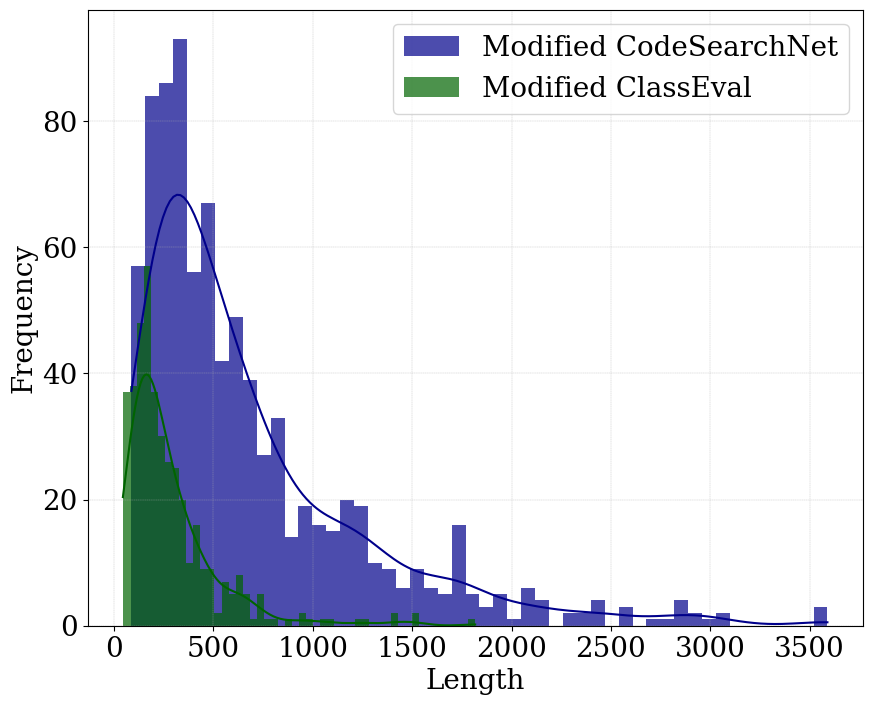

In [30]:
plt.rcParams.update({
    'font.size': 20,
    'font.family': 'serif',
})
plt.figure(figsize=(10, 8))
sns.histplot(data=df_mcsn, x='method_code_length', bins=50, kde=True, color='darkblue', alpha=0.7, linewidth=0, label='Modified CodeSearchNet')
sns.histplot(data=df_mce, x='method_code_length', bins=50, kde=True, color='darkgreen', alpha=0.7, linewidth=0, label='Modified ClassEval')
plt.xlabel('Length')
# plt.xticks(np.arange(0, 550, 25))
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.25)
plt.legend()
plt.show()